# PaddlePaddle教学

## 项目描述
此教程旨在介绍PaddlePaddle(一个易用、高效、灵活、可扩展的深度学习框架)，根据PaddlePaddle 2.0 rc官方手册编写，介绍了PaddlePaddle中比较常用的一些API以及其基本用法。

## 数据集介绍
无

## 项目要求
* 学会使用自动微分（一个强大的实用工具）
* 使用PaddlePaddle实现深度学习中的常用功能
* 使用paddle.io.Dataset处理数据
* 了解PaddlePaddle中的自动混合精度训练

## 数据准备
无

## 环境配置/安装

无

# PaddlePaddle 介绍

##### 此教程根据 [PaddlePaddle 2.0 rc官方手册](https://www.paddlepaddle.org.cn/documentation/docs/zh/2.0-rc/guides/index_cn.html)编写。

此教程旨在介绍PaddlePaddle(一个易用、高效、灵活、可扩展的深度学习框架)        
本教程只介绍了paddle中比较常用的一些API以及其基本用法，并不全面，如有任何问题请参考[PaddlePaddle 2.0 rc官方手册](https://www.paddlepaddle.org.cn/documentation/docs/zh/2.0-rc/guides/index_cn.html)，也可以[百度一下](https://www.baidu.com/)       
        
你将收获以下知识：
- 自动微分是一个强大的实用工具
- 使用PaddlePaddle实现深度学习中的常用函数
- 使用paddle.io.Dataset处理数据
- PaddlePaddle中的自动混合精度训练

In [1]:
import paddle
import paddle.fluid as fluid
from paddle import seed
# 使用动态图模式
paddle.disable_static()
seed(446)
x = fluid.layers.uniform_random([10], dtype="float32", min=0.0, max=1.0)
print(x)
paddle.seed(446)
x3 = fluid.layers.uniform_random(
    [10], dtype="float32", min=0.0, max=1.0)
print(x3)
print(x.numpy() == x3.numpy())

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/paddle/fluid/layers/utils.py:26: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  def convert_to_list(value, n, name, dtype=np.int):


Tensor(shape=[10], dtype=float32, place=CUDAPlace(0), stop_gradient=True,
       [0.01002516, 0.92447233, 0.20326197, 0.65862960, 0.70824307, 0.60163826, 0.67921758, 0.51174110, 0.25614980, 0.60655338])
Tensor(shape=[10], dtype=float32, place=CUDAPlace(0), stop_gradient=True,
       [0.01002516, 0.92447233, 0.20326197, 0.65862960, 0.70824307, 0.60163826, 0.67921758, 0.51174110, 0.25614980, 0.60655338])
[ True  True  True  True  True  True  True  True  True  True]


## Paddle中张量以及张量和numpy数组之间的转换

到目前为止，我们已经使用了不少和numpy数组相关的操作。 作为PaddlePaddle中数据处理的基本元素，张量`tensor`和numpy数组中的`ndarray`非常相似。

In [2]:
import paddle.fluid as fluid
import numpy as np
paddle.disable_static()

# 使用创建numpy数组相同的方式来创建Tensor
x_numpy = np.array([[2.5, 2.5], [2.5, 2.5], [2.5, 2.5]])
x_paddle = paddle.to_tensor(x_numpy)
# [[2.5, 2.5], [2.5, 2.5], [2.5, 2.5]]
data = fluid.layers.fill_constant(shape=[3, 2], value=2.5, dtype='float64')
x_paddle = fluid.layers.create_tensor(dtype='float64')
# x_paddle = [2.50000000, 2.50000000, 2.50000000, 2.50000000, 2.50000000, 2.50000000]
fluid.layers.assign(data, x_paddle)
print('x_numpy, x_paddle')
print(x_numpy, x_paddle)
print()

# 根据numpy数组创建Paddle Tensor
print('to and from numpy and paddle')
x_numpy = np.array([[2.5, 2.5], [2.5, 2.5], [2.5, 2.5]], dtype=np.float32)
# x_paddle = [2.50000000, 2.50000000, 2.50000000, 2.50000000, 2.50000000, 2.50000000]
# input size not support float64 
x_paddle = fluid.layers.assign(x_numpy)
print(x_paddle, x_paddle.numpy)
print()

# 使用 +-*/ 操作Paddle Tensors
y_numpy = np.array([[3,4], [5, 6], [7, 8]])
y_paddle = paddle.to_tensor([[3,4], [5, 6], [7, 8]])
print("x+y")
print(x_numpy + y_numpy)
print(x_paddle + y_paddle)
print()

# 很多numpy中函数使用方式同样适用于Paddle
print("norm")
print(np.linalg.norm(x_numpy), paddle.norm(x_paddle))
print()

# 计算指定维度上的数据均值
print("mean along the 0th dimension")
x_numpy = np.array([[1,2],[3,4.]])
x_paddle = paddle.to_tensor([[1,2],[3,4.]])
print(np.mean(x_numpy, axis=0), paddle.mean(x_paddle, axis=0))


x_numpy, x_paddle
[[2.5 2.5]
 [2.5 2.5]
 [2.5 2.5]] Tensor(shape=[3, 2], dtype=float64, place=CUDAPlace(0), stop_gradient=True,
       [[2.50000000, 2.50000000],
        [2.50000000, 2.50000000],
        [2.50000000, 2.50000000]])

to and from numpy and paddle
Tensor(shape=[3, 2], dtype=float32, place=CUDAPlace(0), stop_gradient=True,
       [[2.50000000, 2.50000000],
        [2.50000000, 2.50000000],
        [2.50000000, 2.50000000]]) <bound method PyCapsule.numpy of Tensor(shape=[3, 2], dtype=float32, place=CUDAPlace(0), stop_gradient=True,
       [[2.50000000, 2.50000000],
        [2.50000000, 2.50000000],
        [2.50000000, 2.50000000]])>

x+y
[[ 5.5  6.5]
 [ 7.5  8.5]
 [ 9.5 10.5]]
Tensor(shape=[3, 2], dtype=float32, place=CUDAPlace(0), stop_gradient=True,
       [[5.50000000 , 6.50000000 ],
        [7.50000000 , 8.50000000 ],
        [9.50000000 , 10.50000000]])

norm
6.1237245 Tensor(shape=[1], dtype=float32, place=CUDAPlace(0), stop_gradient=True,
       [6.12372446])

mean a

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/paddle/tensor/creation.py:143: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if data.dtype == np.object:
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/paddle/fluid/dygraph/math_op_patch.py:238: UserWarning: The dtype of left and right variables are not the same, left dtype is VarType.FP32, but right dtype is VarType.INT64, the right dtype will convert to VarType.FP32
  format(lhs_dtype, rhs_dtype, lhs_dtype))


### `paddle.reshape()`
我们可以使用`paddle.reshape()`函数来改变Tensors的维度和排列，该函数的使用方法类似`numpy.reshape()`函数。


此函数还能根据指定的其他维度自动计算剩下那一个维度的值（参数中可以使用-1来替代），这在操作batch但是batch维度不明确的时候非常实用。

In [3]:
# "MNIST"
N, C, W, H = 10000, 3, 28, 28
X = paddle.randn((N, C, W, H))

print(X.shape)
print(paddle.reshape(X, shape=(N, C, 784)).shape)
# 根据第二、三个维度自动计算第一个维度的值
print(paddle.reshape(X, shape=(-1, C, 784)).shape)

[10000, 3, 28, 28]
[10000, 3, 784]
[10000, 3, 784]


### `广播语义`
符合下面规则的两个tensor是“可广播的”：

每个tensor至少含有一个维度。

当迭代维度大小时，从最后一维开始，该维度的大小相等或者至少有一个等于1又或者其中一个tensor该维度不存在。

In [4]:
# Paddle operations support NumPy Broadcasting Semantics.
x=paddle.empty((5,1,4,1), dtype=np.int64)
y=paddle.empty((  3,1,1), dtype=np.int64)
print((x+y).shape)

[5, 3, 4, 1]


/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/paddle/fluid/data_feeder.py:56: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.bool, np.float16, np.float32, np.float64, np.int8, np.int16,


## 计算图

Paddle中`tensor`的特殊之处在于它会在后台隐式的建一个计算图，计算图是一种将数学表达式计算过程用图表达出来的方法，算法会按照算术函数的计算顺序将计算图中所有变量的值有效计算出来。


比如这个表达式 $e=(a+b)*(b+1)$ 当 $a=2, b=1$时。 在Paddle中我们能画出评估计算图如下图所示"

![](https://ai-studio-static-online.cdn.bcebos.com/3d9f4288031b40219090095c10b3821cedb8fcd8fa714cc5b657eadea1e7b37a)

In [5]:
 # we set requires_grad=True to let Paddle know to keep the graph
a = paddle.to_tensor(2.0, stop_gradient=False)
b = paddle.to_tensor(1.0, stop_gradient=False)
c = a + b
d = b + 1
e = c * d
print('c', c)
print('d', d)
print('e', e)

c Tensor(shape=[1], dtype=float32, place=CUDAPlace(0), stop_gradient=False,
       [3.])
d Tensor(shape=[1], dtype=float32, place=CUDAPlace(0), stop_gradient=False,
       [2.])
e Tensor(shape=[1], dtype=float32, place=CUDAPlace(0), stop_gradient=False,
       [6.])


## CUDA 语义

在Paddle中我们可以很简单的在指定的GPU或者CPU上创建tensor。      
在Paddle中我们可以很简单的设置数据操作的全局运行设备。

In [6]:
# use cpu
cpu = paddle.set_device("cpu")
paddle.disable_static(cpu)
x = paddle.rand((10,))
print(x)
# use gpu
gpu = paddle.set_device("gpu")
paddle.disable_static(gpu)
y = x*2
print(y)

# create tensor on cpu
cpu_tensor = paddle.to_tensor(x, place=paddle.CPUPlace())
print(cpu_tensor)
# create tensor on gpu
gpu_tensor = paddle.to_tensor(x, place=paddle.CUDAPlace(0))
print(gpu_tensor)

Tensor(shape=[10], dtype=float32, place=CPUPlace, stop_gradient=True,
       [0.47338870, 0.43188271, 0.36742651, 0.46920347, 0.50838202, 0.65226251, 0.19124837, 0.46995333, 0.88267577, 0.35630536])
Tensor(shape=[10], dtype=float32, place=CUDAPlace(0), stop_gradient=True,
       [0.94677740, 0.86376542, 0.73485303, 0.93840694, 1.01676404, 1.30452502, 0.38249674, 0.93990666, 1.76535153, 0.71261072])
Tensor(shape=[10], dtype=float32, place=CPUPlace, stop_gradient=True,
       [0.47338870, 0.43188271, 0.36742651, 0.46920347, 0.50838202, 0.65226251, 0.19124837, 0.46995333, 0.88267577, 0.35630536])
Tensor(shape=[10], dtype=float32, place=CUDAPlace(0), stop_gradient=True,
       [0.47338870, 0.43188271, 0.36742651, 0.46920347, 0.50838202, 0.65226251, 0.19124837, 0.46995333, 0.88267577, 0.35630536])


## Paddle 是一个会自动计算梯度的框架
        
我们知道Paddle无时无刻不在使用图，接下来我们展示一些Paddle自动计算梯度的使用案例。

函数 $f(x) = (x-2)^2$.

Q: 如何计算 $\frac{d}{dx} f(x)$ 以及如何计算 $f'(1)$.

我们可以先计算叶子变量(`y`)，然后调用`backward()`函数，一次性计算出`y`的所有所有梯度。

In [7]:
def f(x):
    return (x-2)**2

def fp(x):
    return 2*(x-2)

x = paddle.to_tensor([1.0], stop_gradient=False)

y = f(x)
y.backward()

print('Analytical f\'(x):', fp(x))
print('Paddle\'s f\'(x):', x.grad)

Analytical f'(x): Tensor(shape=[1], dtype=float32, place=CUDAPlace(0), stop_gradient=False,
       [-2.])
Paddle's f'(x): [-2.]


该方法也能计算函数的梯度。

例如 $w = [w_1, w_2]^T$

函数 $g(w) = 2w_1w_2 + w_2\cos(w_1)$

Q: 计算 $\nabla_w g(w)$ 并验证 $\nabla_w g([\pi,1]) = [2, \pi - 1]^T$

In [8]:
import paddle
import numpy as np

def g(w):
    return 2*w[0]*w[1] + w[1]*paddle.fluid.layers.cos(w[0])

def grad_g(w):
    return [2*w[1] - w[1]*paddle.fluid.layers.sin(w[0]), 2*w[0] + paddle.fluid.layers.cos(w[0])]

w = paddle.to_tensor([np.pi, 1], stop_gradient=False)

z = g(w)
z.backward()

print('Analytical grad g(w)', grad_g(w))
print('Paddle\'s grad g(w)', w.grad)

Analytical grad g(w) [Tensor(shape=[1], dtype=float32, place=CUDAPlace(0), stop_gradient=False,
       [2.]), Tensor(shape=[1], dtype=float32, place=CUDAPlace(0), stop_gradient=False,
       [5.28318548])]
Paddle's grad g(w) [2.        5.2831855]


## 使用梯度
我们得到梯度之后，就可以使用我们最喜欢的优化算法：梯度下降算法了！

函数 $f$ （由上面定义并计算）.

Q: 如何计算 $x$ 让 $f$最小?"

# 线性回归

接下来，我们构造一些数据，并降低损失函数在这些数据上的计算值。

我们实现梯度下降方法来解决线性回归任务。

In [9]:
import paddle.fluid as fluid
paddle.disable_static()

# make a simple linear dataset with some noise

d = 2
n = 50
X = paddle.randn((n,d))
true_w = paddle.to_tensor([[-1.0], [2.0]])
y = fluid.layers.matmul(x=X, y=true_w) + paddle.randn((n,1)) * 0.1
print('X shape', X.shape)
print('y shape', y.shape)
print('w shape', true_w.shape)

X shape [50, 2]
y shape [50, 1]
w shape [2, 1]


### 注意数据维度

Paddle有很多处理batch数据的操作，按照约定俗成的规则，batch数据的维度是$(N, d)$，其中$N$是batch的大小。

### 正确性检查
为了验证Paddle中梯度计算结果的正确性，我们可以调用梯度计算来计算RSS的梯度:

$$\nabla_w \mathcal{L}_{RSS}(w; X) = \nabla_w\frac{1}{n} ||y - Xw||_2^2 = -\frac{2}{n}X^T(y-Xw)$$

Padddle梯度计算正确性验证完毕之后，接下来我们介绍如何使用梯度！

## 使用自动计算导数的GD来训练线性回归模型

我们接下来使用梯度来运行梯度下降算法


注意：这个例子是为了说明Paddle和我们之前所常用的一些使用方法之间的联系，在接下来的例子中，我们会看到如何使用Paddle所特有的方式来解决问题。

## paddle.nn.Module

`Module`是Paddle处理tensor操作的一种方式。Modules是`paddle.nn.Module`类的子类，它的所有模块都是可调用的且能被组合成复杂函数。

[`paddle.nn` docs](https://www.paddlepaddle.org.cn/documentation/docs/zh/2.0-beta/api/index_cn.html)

注意：Modules中大部分的功能都能通过`paddle.nn.functional`中的函数来访问， 如何通过`paddle.nn.functional`中的函数来访问，需要自己创建和管理权重tensors。

[`paddle.nn.functional` docs](https://www.paddlepaddle.org.cn/documentation/docs/zh/2.0-beta/api/paddle/nn/layer/pooling/AdaptiveAvgPool1d_cn.html).

### 线性模型
modules的基本组成部分是带有偏置的可进行线性变换的线性模型。线性模型的输入参数为输入数据的维度和输出数据的维度，并生成线性变换权重。


和我们手动初始化$w$不同的是，线性模型能自动随机初始化权重。在最小化凸损失函数过程中（比如：训练神经网络），初始化非常重要且能影响模型结果。如果训练和我们预期的不一致，手动初始化权重改变默认的初始化权重是我们的解决方案之一。Paddle在`paddle.nn.initializer`模块中实现了一些常见的通用初始化函数。

[`paddle.nn.initializer` docs](https://www.paddlepaddle.org.cn/documentation/docs/zh/2.0-rc/api/paddle/fluid/initializer/Bilinear_cn.html)

In [10]:
import paddle
import numpy as np
import paddle.fluid as fluid
from paddle.fluid.dygraph import Linear
from paddle.fluid.dygraph.base import to_variable
paddle.disable_static()

d_in = 3
d_out = 4
linear_module = Linear(d_in, d_out)
example_tensor = paddle.to_tensor([[1,2,3], [4,5,6]], dtype=np.float32)
print('example_tensor', example_tensor.shape)
# applys a linear transformation to the data
transformed = linear_module(example_tensor)
print('transormed', transformed.shape)
print('We can see that the weights exist in the background\n')
print('W:', linear_module.weight)
print('b:', linear_module.bias)

example_tensor [2, 3]
transormed [2, 4]
We can see that the weights exist in the background

W: Parameter containing:
Tensor(shape=[3, 4], dtype=float32, place=CUDAPlace(0), stop_gradient=False,
       [[ 0.42431274, -0.84513336, -0.09373553,  0.70188046],
        [-0.83907843, -0.37568173,  0.43144980, -0.73579890],
        [ 0.41509503,  0.45389998, -0.25071356,  0.12635039]])
b: Parameter containing:
Tensor(shape=[4], dtype=float32, place=CUDAPlace(0), stop_gradient=False,
       [0., 0., 0., 0.])


### 激活函数

Paddle实现了包括但不限于 `ReLU`, `Tanh`, and `Sigmoid`的一些激活函数。这些函数都是一些独立的modules，使用的时候都需要先实例化。

In [11]:
import paddle
# we instantiate an instance of the ReLU module
activation_fn = paddle.nn.ReLU() 
example_tensor = paddle.to_tensor([-1.0, 1.0, 0.0])
activated = activation_fn(example_tensor)
print('example_tensor', example_tensor)
print('activated', activated)

example_tensor Tensor(shape=[3], dtype=float32, place=CUDAPlace(0), stop_gradient=True,
       [-1.,  1.,  0.])
activated Tensor(shape=[3], dtype=float32, place=CUDAPlace(0), stop_gradient=True,
       [0., 1., 0.])


### 顺序容器

很多时候，我们需要很多Modules组合在一起计算，`paddle.nn.Sequential`模块给我们组合这些modules实现了一个简单易用的接口。

In [12]:
import paddle
import paddle.nn as nn
paddle.disable_static()

d_in = 3
d_hidden = 4
d_out = 1
model = nn.Sequential(
                        paddle.nn.Linear(d_in, d_hidden),
                        paddle.nn.Tanh(),
                        paddle.nn.Linear(d_hidden, d_out),
                        paddle.nn.Sigmoid()
                    )

example_tensor = paddle.to_tensor([[1.,2,3],[4,5,6]])
transformed = model(example_tensor)
print('transformed', transformed.shape)

transformed [2, 1]


注意: 我们可以通过`parameters()`方法来访问`nn.Module`的所有的参数。


In [13]:
params = model.parameters()

for param in params:
    print(param)

Parameter containing:
Tensor(shape=[3, 4], dtype=float32, place=CUDAPlace(0), stop_gradient=False,
       [[-0.24470876, -0.72326243,  0.07521644, -0.29203761],
        [-0.40923607,  0.91344702, -0.10443936,  0.62519979],
        [-0.86522645,  0.25138199,  0.66073710, -0.06111625]])
Parameter containing:
Tensor(shape=[4], dtype=float32, place=CUDAPlace(0), stop_gradient=False,
       [0., 0., 0., 0.])
Parameter containing:
Tensor(shape=[4, 1], dtype=float32, place=CUDAPlace(0), stop_gradient=False,
       [[-0.91077131],
        [ 0.75315511],
        [-0.08332373],
        [ 0.35569808]])
Parameter containing:
Tensor(shape=[1], dtype=float32, place=CUDAPlace(0), stop_gradient=False,
       [0.])


### 损失函数

Paddle实现了包括`MSELoss` 和 `CrossEntropyLoss`在内的很多常见的损失函数。

## paddle.optimizer
Paddle在`paddle.optimizer`模块中实现了一些基于梯度的优化函数，包括梯度下降等常见的优化方法。在最小化网络损失值的过程中，需要先获取模型参数和学习率。

优化函数不会计算梯度，我们需要调用`backward()`来计算梯度。我们还需要在调用`backward()`函数之前调用`optim.clear_grad()`，原因是Paddle是默认梯度累加而不是梯度更新。
     
[`paddle.optimizer` docs](https://www.paddlepaddle.org.cn/documentation/docs/zh/2.0-rc/api/paddle/optimizer/Optimizer_cn.html#optimizer)

In [14]:
import paddle
paddle.disable_static()

# create a simple model
model = paddle.nn.Linear(1, 1)

# create a simple dataset
X_simple = paddle.to_tensor([[1.]])
y_simple = paddle.to_tensor([[2.]])

# create our optimizer
optim = paddle.optimizer.SGD(learning_rate=1e-2, parameters=model.parameters())
mse_loss_fn = paddle.nn.loss.MSELoss()

y_hat = model(X_simple)
print('model params before:', model.weight)
loss = mse_loss_fn(y_hat, y_simple)
loss.backward()
optim.clear_grad()
optim.step()
print('model params after:', model.weight)

model params before: Parameter containing:
Tensor(shape=[1, 1], dtype=float32, place=CUDAPlace(0), stop_gradient=False,
       [[0.04067237]])
model params after: Parameter containing:
Tensor(shape=[1, 1], dtype=float32, place=CUDAPlace(0), stop_gradient=False,
       [[0.04067237]])


正如我们所看到的这样，参数值是朝着正确的方向在更新的。

## 用GD自动计算导数的线性回归和Paddle中的Modules


接下里我们结合之前所学用Paddle的方式来解决线性回归问题。

In [15]:
import paddle
paddle.disable_static()

step_size = 0.1

linear_module = paddle.nn.Linear(d, 1)

loss_func = paddle.nn.loss.MSELoss()

optim = paddle.optimizer.SGD(learning_rate=step_size, parameters=linear_module.parameters())

print('iter,\tloss,\tw')

for i in range(20):
    y_hat = linear_module(X)
    loss = loss_func(y_hat, y)
    loss.backward()
    optim.minimize(loss)
    linear_module.clear_gradients()
    optim.step()
    print('{},\t{},\t{}'.format(i, loss.numpy(), linear_module.weight.reshape((1,2)).numpy()))


print('\ntrue w\t\t', true_w.reshape((1, 2)).numpy())
print('estimated w\t', linear_module.weight.reshape((1, 2)).numpy())

iter,	loss,	w
0,	[6.8440084],	[[0.8750538 1.0889448]]
1,	[4.324582],	[[0.49516663 1.2639549 ]]
2,	[2.742772],	[[0.19371322 1.404366  ]]
3,	[1.7465012],	[[-0.04562304  1.5172662 ]]
4,	[1.1169634],	[[-0.23574035  1.6082447 ]]
5,	[0.7178161],	[[-0.38683942  1.6817173 ]]
6,	[0.46386436],	[[-0.5069913  1.7411795]]
7,	[0.30171737],	[[-0.6025853  1.7894039]]
8,	[0.19781339],	[[-0.67868155  1.8285946 ]]
9,	[0.1309885],	[[-0.7392896  1.860507 ]]
10,	[0.08785284],	[[-0.7875881  1.8865429]]
11,	[0.05990634],	[[-0.82609826  1.9078237 ]]
12,	[0.04173437],	[[-0.85682076  1.9252486 ]]
13,	[0.02987545],	[[-0.881344   1.9395404]]
14,	[0.02210891],	[[-0.9009299  1.9512811]]
15,	[0.01700479],	[[-0.91658133  1.9609407 ]]
16,	[0.01363901],	[[-0.9290957  1.9688995]]
17,	[0.01141226],	[[-0.9391074  1.9754655]]
18,	[0.00993441],	[[-0.9471216  1.9808893]]
19,	[0.00895062],	[[-0.9535405  1.9853748]]

true w		 [[-1.  2.]]
estimated w	 [[-0.9535405  1.9853748]]


# Paddle中的神经网络基础

我们使用一个简单的神经网络来拟合数据。

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/__init__.py:107: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import MutableMapping
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/rcsetup.py:20: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Iterable, Mapping
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/colors.py:53: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sized
2021-08-11 18:22:10,083 - INFO - font search path ['/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf', '/opt/co

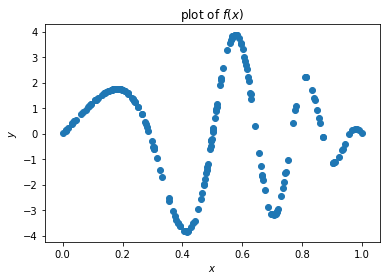

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

d = 1
n = 200
X = paddle.rand(shape=[n,d])
y = 4 * paddle.sin(np.pi * X) * paddle.cos(6*np.pi*X**2)

plt.scatter(X.numpy(), y.numpy())
plt.title('plot of $f(x)$')
plt.xlabel('$x$')
plt.ylabel('$y$')

plt.show()

我们使用了一个简单的含有两个隐藏层和Tanh激活函数的神经网络。我们可以通过调节这个神经网络的一些超参数来说明超参数是如何改变模型结果的。

In [17]:
import paddle
paddle.disable_static()

# feel free to play with these parameters

step_size = 0.05
n_epochs = 6000
n_hidden_1 = 32
n_hidden_2 = 32
d_out = 1

neural_network = paddle.nn.Sequential(
                            paddle.nn.Linear(d, n_hidden_1), 
                            paddle.nn.Tanh(),
                            paddle.nn.Linear(n_hidden_1, n_hidden_2),
                            paddle.nn.Tanh(),
                            paddle.nn.Linear(n_hidden_2, d_out)
                            )

loss_func =  paddle.nn.loss.MSELoss()

optim = paddle.optimizer.SGD(learning_rate=step_size, parameters=neural_network.parameters())
print('iter,\tloss')
for i in range(n_epochs):
    y_hat = neural_network(X)
    loss = loss_func(y_hat, y)
    loss.backward()
    optim.minimize(loss)
    neural_network.clear_gradients()
    optim.step()
    
    if i % (n_epochs // 10) == 0:
        print('{},\t{}'.format(i, loss.numpy()))


iter,	loss
0,	[4.2171335]
600,	[3.993063]
1200,	[3.6951501]
1800,	[1.7973866]
2400,	[0.89272165]
3000,	[0.32496896]
3600,	[0.21181478]
4200,	[0.15434483]
4800,	[0.10803313]
5400,	[0.08734553]


<>:5: DeprecationWarning: invalid escape sequence \h
<>:5: DeprecationWarning: invalid escape sequence \h
<>:5: DeprecationWarning: invalid escape sequence \h
<ipython-input-18-e3b14b1061d7>:5: DeprecationWarning: invalid escape sequence \h
  plt.title('plot of $f(x)$ and $\hat{f}(x)$')
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/paddle/fluid/data_feeder.py:56: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.bool, np.float16, np.float32, np.float64, np.int8, np.int16,


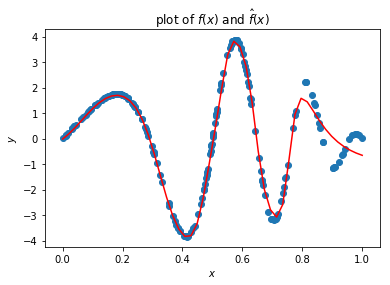

In [18]:
X_grid = paddle.to_tensor(np.linspace(0,1,50), dtype=np.float32).reshape((-1, d))
y_hat = neural_network(X_grid)
plt.scatter(X.numpy(), y.numpy())
plt.plot(X_grid.detach().numpy(), y_hat.detach().numpy(), 'r')
plt.title('plot of $f(x)$ and $\hat{f}(x)$')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

# 作业帮助

## Momentum

除了随机梯度下降还有其他的一些优化算法：比如修改自SGD的momentum。这里我们不在详述，需要了解更多的可以[点击此处](https://distill.pub/2017/momentum/)学习。

在下面给出的代码中我们只修改了训练步数并且在优化函数中增加了momentum参数。注意观察momentum参数是如何在较少的迭代次数中减少训练损失的。

In [19]:
# feel free to play with these parameters

step_size = 0.05
momentum = 0.9
n_epochs = 1500
n_hidden_1 = 32
n_hidden_2 = 32
d_out = 1

neural_network = paddle.nn.Sequential(
                            paddle.nn.Linear(d, n_hidden_1), 
                            paddle.nn.Tanh(),
                            paddle.nn.Linear(n_hidden_1, n_hidden_2),
                            paddle.nn.Tanh(),
                            paddle.nn.Linear(n_hidden_2, d_out)
                            )

loss_func = paddle.nn.MSELoss()

optim = paddle.optimizer.Momentum(learning_rate=step_size, parameters=neural_network.parameters(), momentum=momentum)
print('iter,\tloss')
for i in range(n_epochs):
    y_hat = neural_network(X)
    loss = loss_func(y_hat, y)
    optim.clear_grad()
    loss.backward()
    optim.step()
    
    if i % (n_epochs // 10) == 0:
        print('{},\t{}'.format(i, loss.numpy()))


iter,	loss
0,	[4.205099]
150,	[3.9756398]
300,	[1.7070374]
450,	[0.2196153]
600,	[0.11150152]
750,	[0.05638471]
900,	[0.04004388]
1050,	[0.05887992]
1200,	[0.01328311]
1350,	[0.01289878]


<>:5: DeprecationWarning: invalid escape sequence \h
<>:5: DeprecationWarning: invalid escape sequence \h
<>:5: DeprecationWarning: invalid escape sequence \h
<ipython-input-20-e3b14b1061d7>:5: DeprecationWarning: invalid escape sequence \h
  plt.title('plot of $f(x)$ and $\hat{f}(x)$')


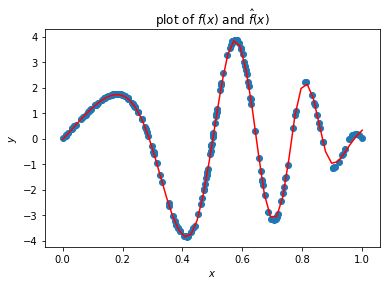

In [20]:
X_grid = paddle.to_tensor(np.linspace(0,1,50), dtype=np.float32).reshape((-1, d))
y_hat = neural_network(X_grid)
plt.scatter(X.numpy(), y.numpy())
plt.plot(X_grid.detach().numpy(), y_hat.detach().numpy(), 'r')
plt.title('plot of $f(x)$ and $\hat{f}(x)$')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

## 交叉熵损失

到目前为止，我们在回归任务中使用了[MSELoss](https://www.paddlepaddle.org.cn/documentation/docs/zh/2.0-rc/api/paddle/nn/layer/loss/MSELoss_cn.html#mseloss)模块。在作业中，我们需要训练一个使用交叉熵损失的分类任务。


Paddle在[CrossEntropyLoss](https://www.paddlepaddle.org.cn/documentation/docs/zh/2.0-beta/api/paddle/nn/layer/loss/CrossEntropyLoss_cn.html#crossentropyloss)模块中实现了一个交叉熵损失版本，它的使用方法相比MSE稍有不同，因此我们在这里给出了它的一些使用注释。

- input (Tensor): - 输入 Tensor ，数据类型为float32或float64。其形状为 [N,C] , 其中 C 为类别数。对于多维度的情形下，它的形状为 [N,C,d1,d2,...,dk] ，k >= 1。

- label (Tensor): - 输入input对应的标签值，数据类型为int64。其形状为 [N] ，每个元素符合条件：0 <= label[i] <= C-1。对于多维度的情形下，它的形状为 [N,d1,d2,...,dk] ，k >= 1。

- output (Tensor): - 计算 CrossEntropyLoss 交叉熵后的损失值。

在三个预测结果中试着输出损失函数的值。真实的标签值为$y=[1,1,0]$。和前两个例子相对应的预测值是正确的，因为它们在正确的便签所对应的列上有更高的分数值。其中第二个例子中的预测结果具有更高的置信度和更小的损失值。最后的两个例子是分别具有更低和更高置信度的不正确的预测。

## 学习率调度器


在训练过程中我们通常并不想使用混合学习率。Paddle提供了学习率调度器来随着训练时间的推移改变学习率。比较常用的策略是每训练一个epoch在学习率上乘以一个常数（比如0.9）或者当训练损失趋于平缓时，学习率减半。

想要获取更多的使用示例请参考 [学习旅调度器](https://www.paddlepaddle.org.cn/documentation/docs/zh/2.0-rc/api/paddle/optimizer/MultiStepLR_cn.html) 文档。

## 卷积操作
在处理图片时，我们经常需要使用卷积操作来提取特征。Paddle在`paddle.nn.Conv2D`模块中实现了这些卷积操作。该模块要求需要参数必须具有指定的维度(输入通道数目, 输出通道数目, 滤波器尺寸)。其中输入通道数目为图片的通道数目，输出通道数目为滤波器的个数，滤波器尺寸为滤波器的大小。

We can modify the convolution to have different properties with the parameters:
我们可以通过修改卷积操作的参数让卷积操作拥有不同的属性：
- 步长
- 填充
- 空洞大小

这些参数的修改会改变输出特征图的维度，因此使用的需要注意。

想了解更多信息，请参考[`paddle.nn.Conv2D` 文档](https://www.paddlepaddle.org.cn/documentation/docs/zh/2.0-rc/api/paddle/fluid/dygraph/Conv2D_cn.html#conv2d)